In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 981 kB 72.9 MB/s 
     |████████████████████████████████| 263 kB 62.6 MB/s 
     |████████████████████████████████| 3.8 MB 56.0 MB/s 
     |████████████████████████████████| 1.3 MB 60.6 MB/s 
     |████████████████████████████████| 468 kB 56.8 MB/s 
     |████████████████████████████████| 596 kB 65.6 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
     |████████████████████████████████| 880 kB 78.2 MB/s 
     |████████████████████████████████| 6.6 MB 64.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.7-py3-none-any.whl size=25312842 sha256=334b049feb144c6b585f8ed664d2786339adcbaae989c35059b249530bff114e
  Stored in directory: /root/.cache/pip/wheels/e5/98/8e/ce355dcb92451e85fab93f7ea2da068843e93e703928cd06fb
  Created wheel for keras-bert: filename=keras_bert-0.89.0-p

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Senti_drug1 = pd.read_csv(r'/content/drive/MyDrive/CleanDatasetMedical.csv')
test_drug1 = pd.read_csv(r'/content/drive/MyDrive/gagan/drugsComTest_raw.csv')

In [ ]:
import pandas as pd
import numpy as np
#path = 'C:/Users/USER/Downloads/CleanDatasetMedical.csv'  # ADD path/to/dataset
#data = pd.read_csv(path)
data = Senti_drug1.sample(frac=1., random_state=0)
data.head()

,Unnamed: 0,Lemmatized_text,comp_score
137738,137738,recently received injection nalbuphine walk no...,0
125778,125778,went emergency room worst pain life nurse kept...,0
26647,26647,horrible cried everyday severe anxiety depress...,0
89592,89592,use medication daily found drastically reduces...,1
83605,83605,tremor seem getting worse take day turned trem...,0


In [ ]:
data = data[pd.notnull(data['Lemmatized_text'])]
data = data[pd.notnull(data['comp_score'])]

In [ ]:
datap=data[data['comp_score']==1]
datan=data[data['comp_score']==0]


In [ ]:
datap.shape

(83562, 3)

In [ ]:
datan.shape

(77729, 3)

In [ ]:
p=1000
datap1 = datap.iloc[:p]
datan1 = datan.iloc[:p]

In [ ]:
data=pd.concat([datap1, datan1])

In [ ]:
data.shape

(3000, 3)

In [ ]:
#n=1000
#data = data.iloc[:n]

In [ ]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 2400
Test size: 600


In [ ]:
# Train features
description_train = data['Lemmatized_text'][:train_size]


# Train labels
labels_train = data['comp_score'][:train_size]

# Test features
description_test = data['Lemmatized_text'][train_size:]


# Test labels
labels_test = data['comp_score'][train_size:]

x_train = description_train.values
y_train = labels_train.values
x_test = description_test.values
y_test = labels_test.values

In [ ]:
#train_df = pd.read_csv("train.csv")
random_seed = 12342
x_train, x_val, y_train, y_val = train_test_split(data['Lemmatized_text'], data['comp_score'], 
                                                  shuffle=True, test_size = 0.2, random_state=random_seed, 
                                                  stratify=data['comp_score'])

In [ ]:

'''Converting split data to list [so it can processed]'''
#train
x_train = x_train.tolist()
y_train = y_train.tolist()

#test
x_test = x_test.tolist()
y_test = y_test.tolist()

In [ ]:
(x_train_b,y_train_b),  (x_val_b, y_val_b), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=['0','1'],
                                           preprocess_mode='bert' ,
                                           lang='en',                                 
                                          maxlen=200, 
                                          max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model=text.text_classifier('bert', train_data=(x_train_b,y_train_b), preproc=preproc)

Is Multi-Label? False
maxlen is 200
done.


In [ ]:
learner=ktrain.get_learner(model, train_data=(x_train_b,y_train_b), val_data=(x_val_b, y_val_b),batch_size=16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
667/667 [==============================] - 1177s 2s/step - loss: 0.6975 - accuracy: 0.5790
Epoch 2/3
667/667 [==============================] - 1165s 2s/step - loss: 1.2603 - accuracy: 0.5487
Epoch 3/3
667/667 [==============================] - 59s 86ms/step - loss: 6.9120 - accuracy: 0.4444


done.
Visually inspect loss plot and select learning rate associated with falling loss


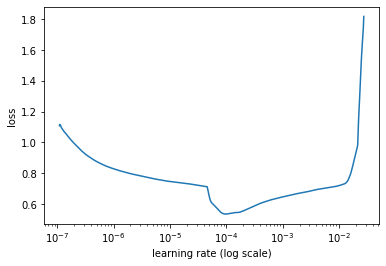

In [ ]:
learner.lr_find(show_plot=True, max_epochs=7)

In [ ]:
learner.autofit(1e-3,12)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/3
667/667 [==============================] - 1314s 2s/step - loss: 0.5521 - accuracy: 0.7197 - val_loss: 0.2649 - val_accuracy: 0.9180
Epoch 2/3
667/667 [==============================] - 1305s 2s/step - loss: 0.3841 - accuracy: 0.8263 - val_loss: 0.1585 - val_accuracy: 0.9490
Epoch 3/3
667/667 [==============================] - 1297s 2s/step - loss: 0.2318 - accuracy: 0.9075 - val_loss: 0.1115 - val_accuracy: 0.9670


In [ ]:
predictor=ktrain.get_predictor(learner.model,preproc)

In [ ]:
predictor

In [ ]:
dft=test_drug1


In [ ]:
n=10000
dft1 = dft.iloc[:n]

In [ ]:
dft1.shape

(1000, 7)

In [ ]:
dft1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
dft1['target']=predictor.predict(dft1['review'].tolist())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dft1.head(100)

,uniqueID,drugName,condition,review,rating,date,usefulCount,target
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,0
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1
...,...,...,...,...,...,...,...,...
95,56193,Humira,Psoriatic Arthritis,"""I really like this medication! It helps me wi...",10,21-May-17,4,1
96,159628,"Insulin inhalation, rapid acting","Diabetes, Type 1","""Horrible""",1,13-May-15,9,0
97,58280,Acetaminophen / hydrocodone,Pain,"""I have been prescribed Vicodin 5/500s for ove...",9,16-Apr-08,15,1
98,38461,Phenazopyridine,Interstitial Cystitis,"""I use Azo-Standard whenever I have issues wit...",10,12-Jul-13,34,0


In [ ]:
dft11=dft1[dft1['target']=='1']
dft12=dft1[dft1['target']=='0']

In [ ]:
dft12.shape

(470, 8)

In [ ]:
dft11.shape

(10000, 8)